In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/players_clean.csv')

print(f"Dataset: {df.shape[0]:,} joueurs, {df.shape[1]} colonnes")

Dataset: 19,239 joueurs, 18 colonnes


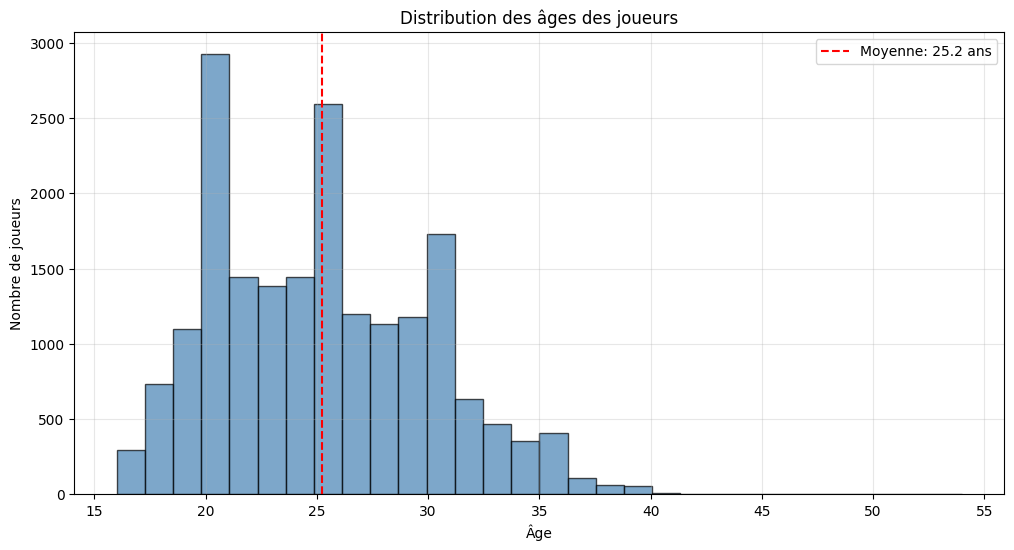

Âge moyen: 25.2 ans
Âge médian: 25.0 ans


In [2]:
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution des âges des joueurs')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["age"].mean():.1f} ans')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Âge moyen: {df['age'].mean():.1f} ans")
print(f"Âge médian: {df['age'].median():.1f} ans")

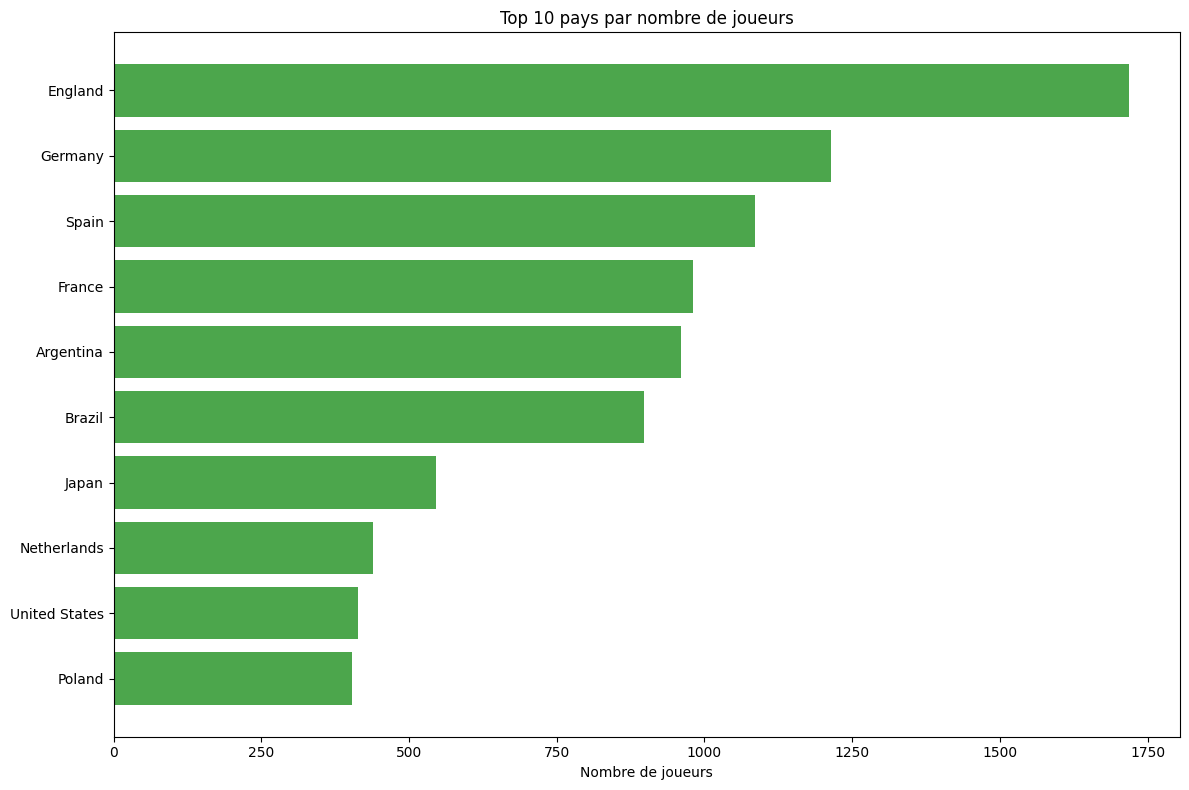

In [3]:
top_countries = df['nationality_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Nombre de joueurs')
plt.title('Top 10 pays par nombre de joueurs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

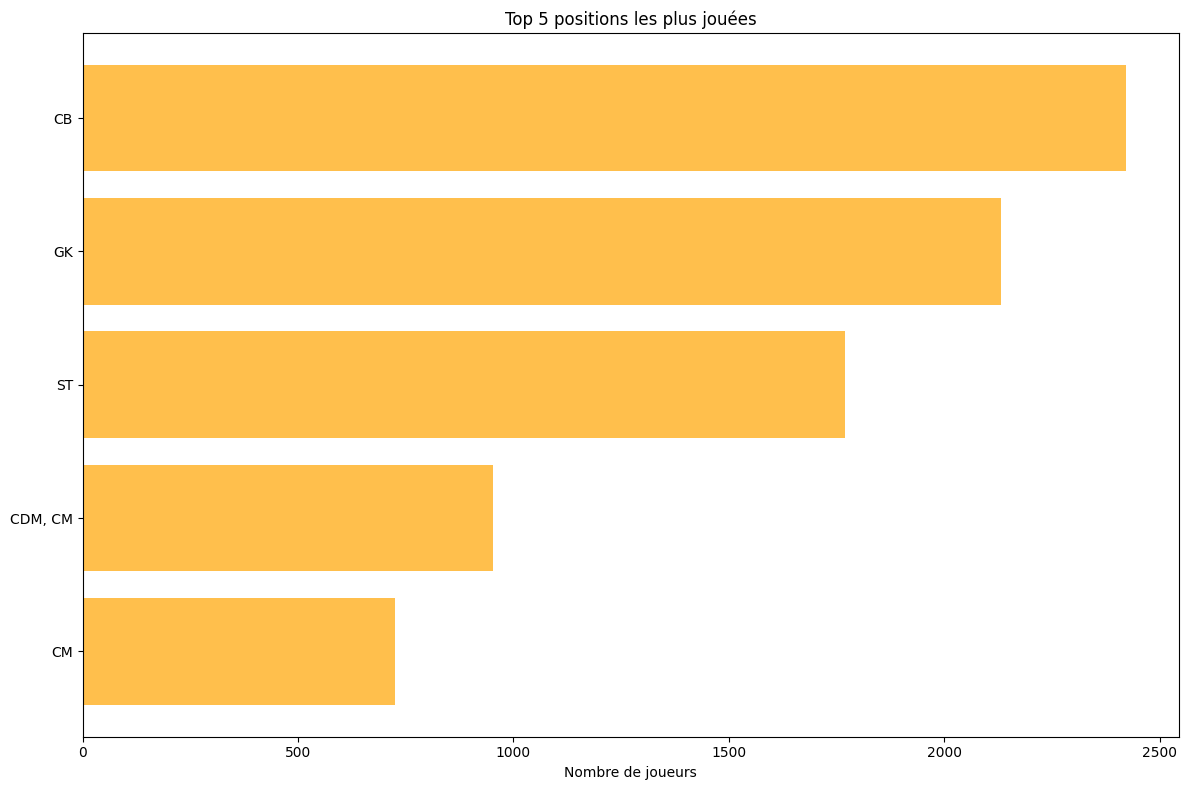

In [4]:
top_positions = df['player_positions'].value_counts().head(5)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_positions)), top_positions.values, color='orange', alpha=0.7)
plt.yticks(range(len(top_positions)), top_positions.index)
plt.xlabel('Nombre de joueurs')
plt.title('Top 5 positions les plus jouées')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_positions.png', dpi=300, bbox_inches='tight')
plt.show()

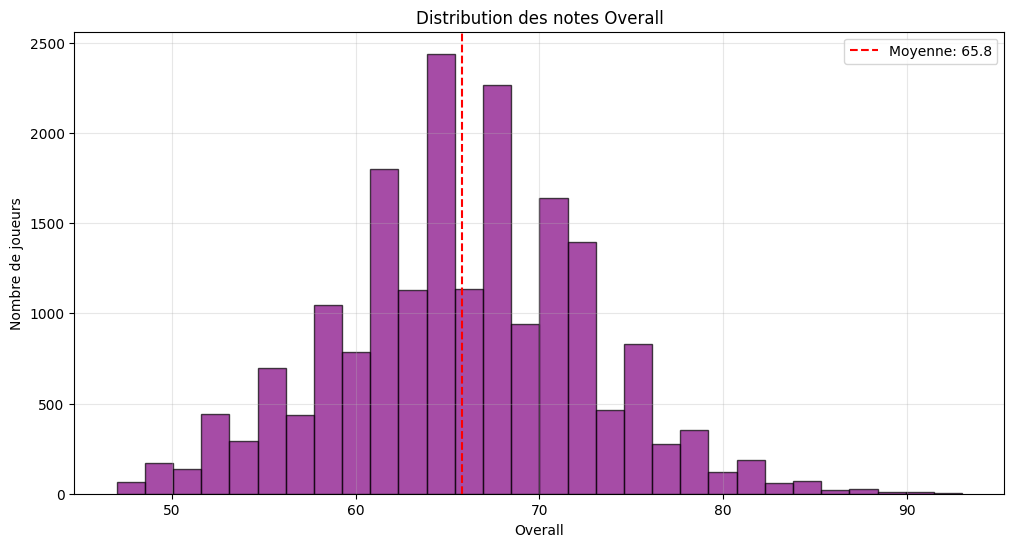

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df['overall'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Overall')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution des notes Overall')
plt.axvline(df['overall'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["overall"].mean():.1f}')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/overall_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
df['age_category'] = pd.cut(df['age'], bins=[15, 21, 25, 29, 33, 50], 
                             labels=['16-21', '22-25', '26-29', '30-33', '34+'])

age_stats = df.groupby('age_category', observed=True).agg({
    'short_name': 'count',
    'overall': 'mean',
    'potential': 'mean'
}, observed=True).round(2)

age_stats.columns = ['Nombre', 'Overall moyen', 'Potential moyen']
print(age_stats)

              Nombre  Overall moyen  Potential moyen
age_category                                        
16-21           5047          60.52            73.12
22-25           5669          65.96            71.96
26-29           4704          68.46            69.41
30-33           2828          69.10            69.11
34+              990          69.20            69.20


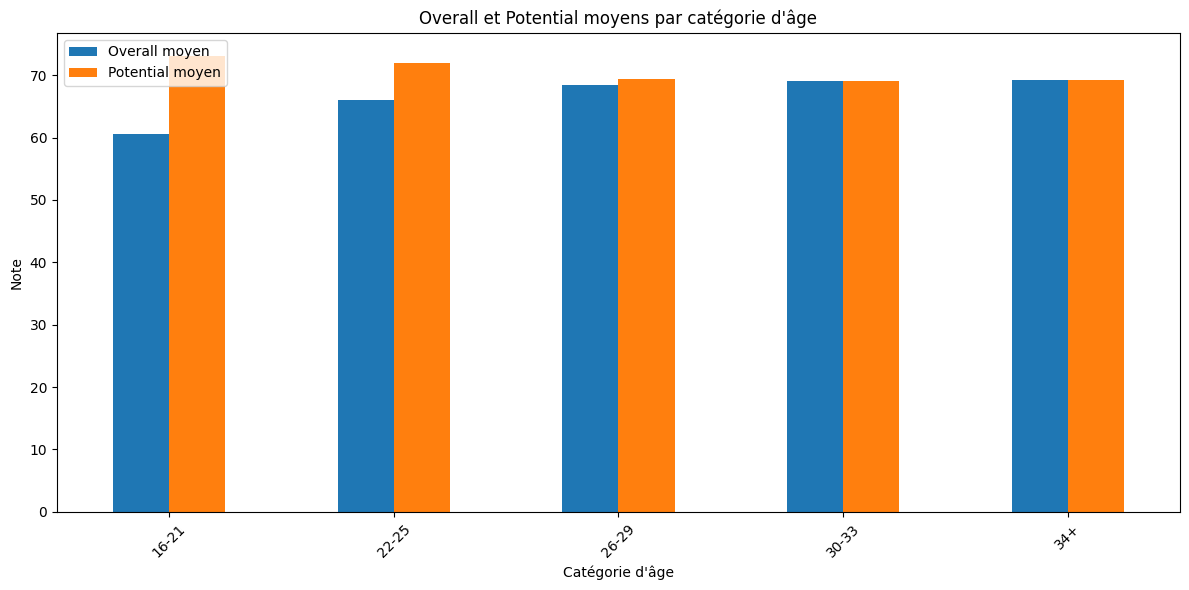

In [7]:
age_stats[['Overall moyen', 'Potential moyen']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Note')
plt.title('Overall et Potential moyens par catégorie d\'âge')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/age_categories_performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
top_leagues = df.groupby('league_name').agg({
    'short_name': 'count',
    'overall': 'mean',
    'wage_eur': 'mean'
}).round(2)

top_leagues.columns = ['Nombre de joueurs', 'Overall moyen', 'Salaire moyen']
top_leagues = top_leagues[top_leagues['Nombre de joueurs'] >= 100]  # Au moins 100 joueurs
top_leagues = top_leagues.sort_values('Overall moyen', ascending=False).head(10)

print("Top 10 ligues par overall moyen:")
print(top_leagues)

Top 10 ligues par overall moyen:
                               Nombre de joueurs  Overall moyen  Salaire moyen
league_name                                                                   
Spain Primera Division                       633          73.47       31128.83
Italian Serie A                              563          72.86       31004.53
English Premier League                       652          72.50       50847.70
Campeonato Brasileiro Série A                360          71.75       15263.89
German 1. Bundesliga                         551          71.32       24407.71
French Ligue 1                               577          70.88       21462.74
Greek Super League                           112          70.79         804.46
Portuguese Liga ZON SAGRES                   505          68.94        6335.84
Turkish Süper Lig                            543          68.36       11915.10
Argentina Primera División                   727          67.71        6140.99


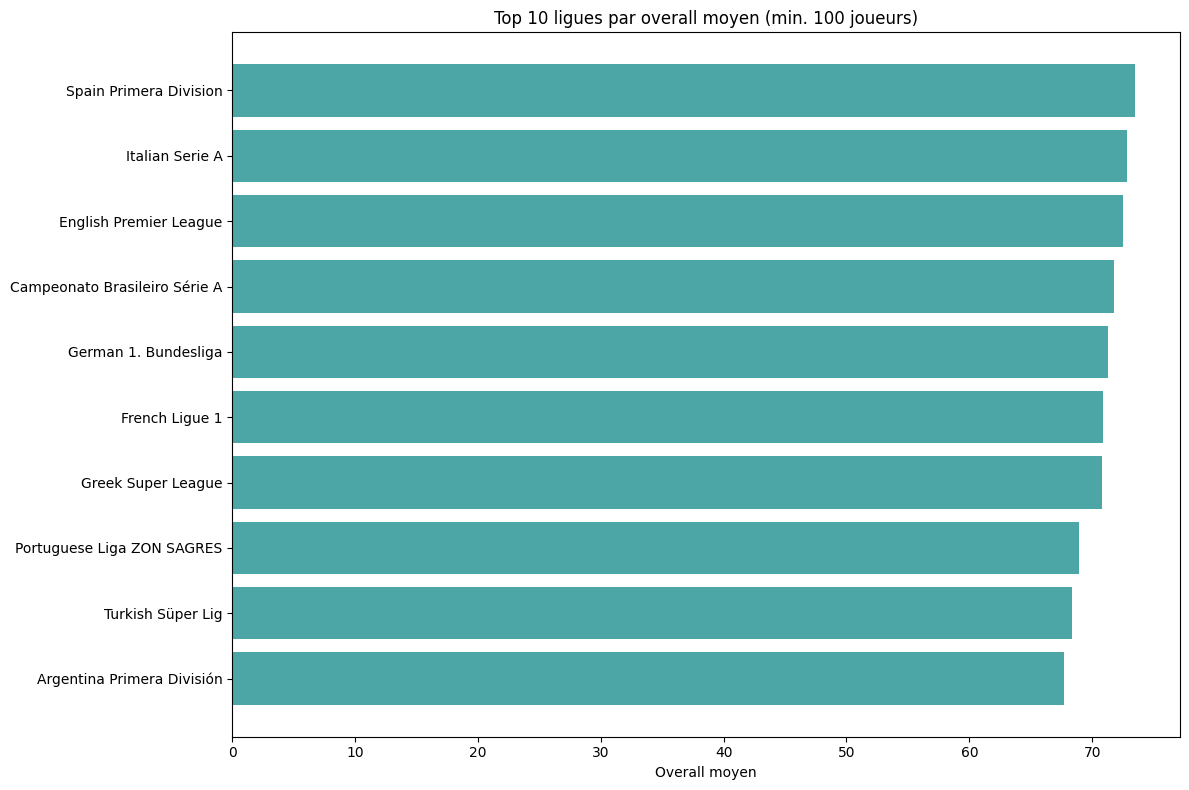

In [9]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_leagues)), top_leagues['Overall moyen'], color='teal', alpha=0.7)
plt.yticks(range(len(top_leagues)), top_leagues.index)
plt.xlabel('Overall moyen')
plt.title('Top 10 ligues par overall moyen (min. 100 joueurs)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_leagues_overall.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
top_salaires = df.nlargest(20, 'wage_eur')[['short_name', 'age', 'overall', 'club_name', 'wage_eur']]
print("Top 20 joueurs les mieux payés:")
print(top_salaires)


Top 20 joueurs les mieux payés:
           short_name  age  overall            club_name  wage_eur
4        K. De Bruyne   30       91      Manchester City  350000.0
11         K. Benzema   33       89       Real Madrid CF  350000.0
0            L. Messi   34       93  Paris Saint-Germain  320000.0
14           Casemiro   29       89       Real Madrid CF  310000.0
24           T. Kroos   31       88       Real Madrid CF  310000.0
27        R. Sterling   26       88      Manchester City  290000.0
1      R. Lewandowski   32       92    FC Bayern München  270000.0
2   Cristiano Ronaldo   36       91    Manchester United  270000.0
3           Neymar Jr   29       91  Paris Saint-Germain  270000.0
16            S. Mané   29       89            Liverpool  270000.0
17           M. Salah   29       89            Liverpool  270000.0
25          R. Lukaku   28       88              Chelsea  260000.0
30          S. Agüero   33       87         FC Barcelona  260000.0
8       M. ter Stegen   29    

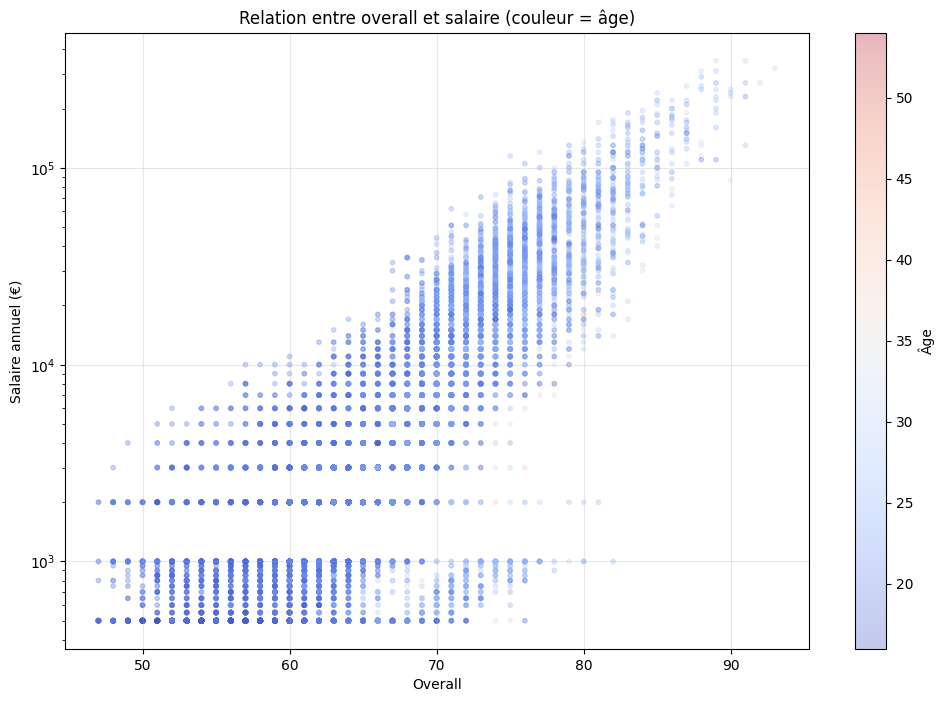

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(df['overall'], df['wage_eur'], alpha=0.3, s=10, c=df['age'], cmap='coolwarm')
plt.colorbar(label='Âge')
plt.xlabel('Overall')
plt.ylabel('Salaire annuel (€)')
plt.title('Relation entre overall et salaire (couleur = âge)')
plt.yscale('log')  # Échelle log pour mieux voir
plt.grid(alpha=0.3)
plt.savefig('../visualizations/overall_vs_salary.png', dpi=300, bbox_inches='tight')
plt.show()

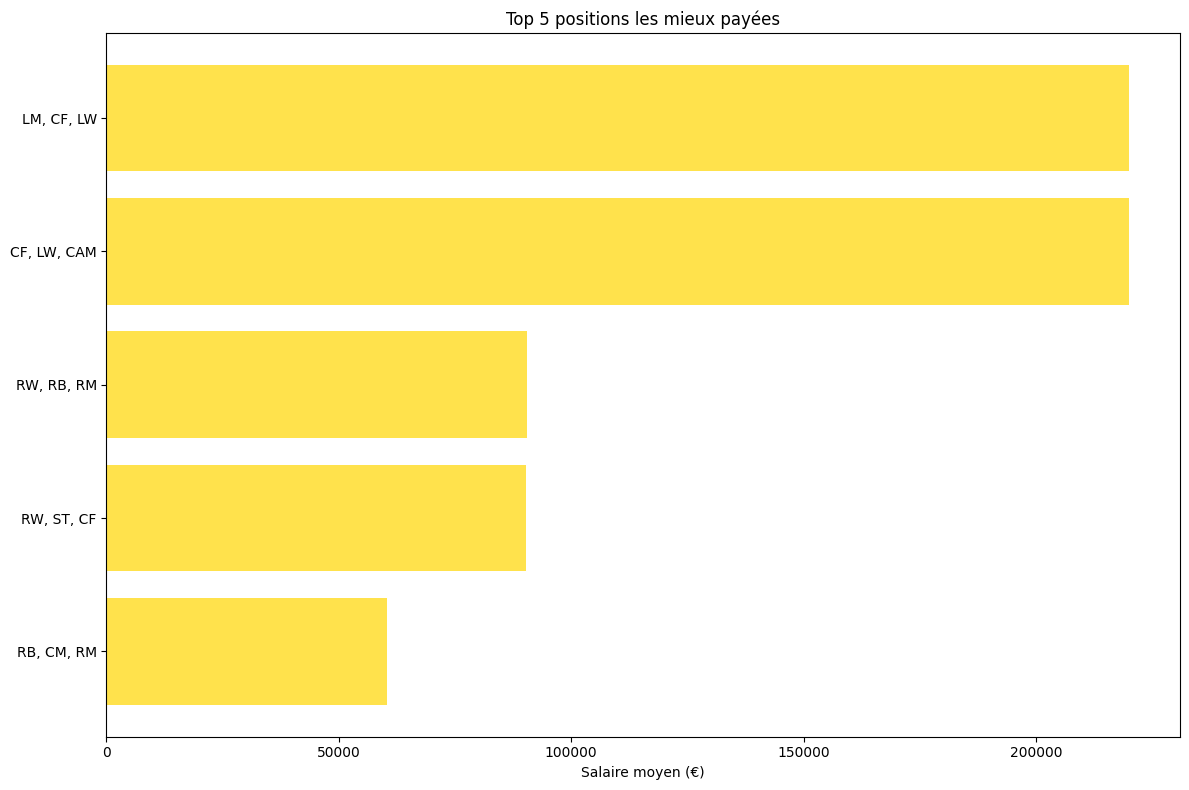

In [22]:
salary_by_position = df[df['wage_eur'] > 0].groupby('player_positions')['wage_eur'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 8))
plt.barh(range(len(salary_by_position)), salary_by_position.values, color='gold', alpha=0.7)
plt.yticks(range(len(salary_by_position)), salary_by_position.index)
plt.xlabel('Salaire moyen (€)')
plt.title('Top 5 positions les mieux payées')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_positions_salary.png', dpi=300, bbox_inches='tight')
plt.show()

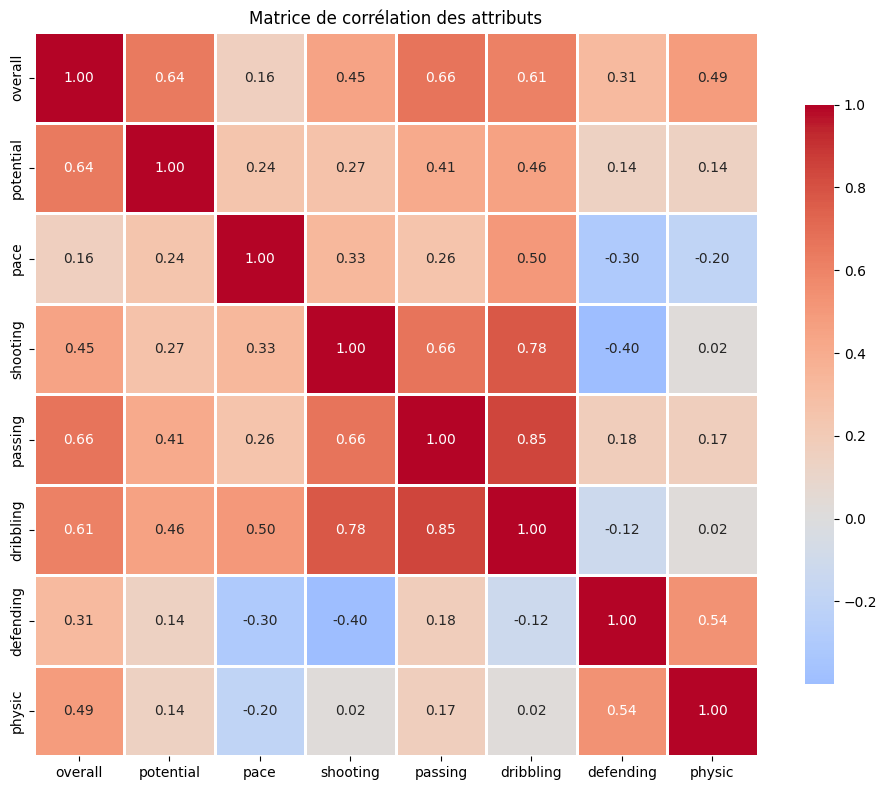

Top 20 jeunes talents (< 23 ans, potential > 80):
               short_name  age  overall  potential            club_name  \
6               K. Mbappé   22       91         95  Paris Saint-Germain   
21          G. Donnarumma   22       89         93  Paris Saint-Germain   
29             E. Haaland   20       88         93    Borussia Dortmund   
44    T. Alexander-Arnold   22       87         92            Liverpool   
138            K. Havertz   22       84         92              Chelsea   
139              P. Foden   21       84         92      Manchester City   
45              J. Sancho   21       87         91    Manchester United   
198            João Félix   21       83         91   Atlético de Madrid   
387                 Pedri   18       81         91         FC Barcelona   
96             M. de Ligt   21       85         90             Juventus   
261          D. Upamecano   22       82         90    FC Bayern München   
280         Ferran Torres   21       82         90

In [23]:
stats_cols = ['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
correlation = df[stats_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation des attributs')
plt.tight_layout()
plt.savefig('../visualizations/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

young_talents = df[(df['age'] < 23) & (df['potential'] > 80)].nlargest(20, 'potential')
young_talents = young_talents[['short_name', 'age', 'overall', 'potential', 'club_name', 'value_eur']]

print("Top 20 jeunes talents (< 23 ans, potential > 80):")
print(young_talents)

In [16]:
club_economics = df[df['wage_eur'] > 0].groupby('club_name').agg({
    'value_eur': 'sum',
    'wage_eur': 'sum',
    'short_name': 'count'
})

club_economics = club_economics[club_economics['short_name'] >= 20]  # Au moins 20 joueurs
club_economics['ratio'] = club_economics['value_eur'] / club_economics['wage_eur']
club_economics = club_economics.sort_values('ratio', ascending=False).head(15)

print("Top 15 clubs avec meilleur ratio valeur/salaire:")
print(club_economics)

Top 15 clubs avec meilleur ratio valeur/salaire:
                             value_eur  wage_eur  short_name        ratio
club_name                                                                
Dynamo Kyiv                159450000.0   19950.0          28  7992.481203
Shakhtar Donetsk           159150000.0   20200.0          28  7878.712871
SK Slavia Praha            168830000.0   22650.0          28  7453.863135
Dinamo Zagreb              119545000.0   17300.0          28  6910.115607
Olympiacos CFP             167595000.0   28400.0          28  5901.232394
AC Sparta Praha            107100000.0   18800.0          26  5696.808511
Panathinaikos FC            62350000.0   16850.0          28  3700.296736
FC Viktoria Plzeň           62535000.0   16950.0          25  3689.380531
AEK Athens                  74300000.0   21400.0          28  3471.962617
PAOK                        81075000.0   23450.0          28  3457.356077
Hajduk Split                51950000.0   15800.0          28  3

In [18]:
insights = f"""
INSIGHTS CLÉS
=================

DÉMOGRAPHIE:
- {len(df):,} joueurs analysés
- Âge moyen: {df['age'].mean():.1f} ans
- Pays le plus représenté: {df['nationality_name'].value_counts().iloc[0]} ({df['nationality_name'].value_counts().values[0]} joueurs)

PERFORMANCE:
- Overall moyen: {df['overall'].mean():.1f}
- Meilleur joueur: {df.nlargest(1, 'overall')['short_name'].iloc[0]} ({df['overall'].max()})
- Pic de performance: {age_stats['Overall moyen'].idxmax()}

FINANCIER:
- Salaire moyen: {df[df['wage_eur'] > 0]['wage_eur'].mean():,.0f} €
- Joueur le mieux payé: {df.nlargest(1, 'wage_eur')['short_name'].iloc[0]}
- Position la mieux payée: {salary_by_position.index[0]}

LIGUES:
- Meilleure ligue (overall): {top_leagues.iloc[0]}
- {len(df['league_name'].unique())} ligues différentes représentées
"""

print(insights)


INSIGHTS CLÉS

DÉMOGRAPHIE:
- 19,239 joueurs analysés
- Âge moyen: 25.2 ans
- Pays le plus représenté: 1719 (1719 joueurs)

PERFORMANCE:
- Overall moyen: 65.8
- Meilleur joueur: L. Messi (93)
- Pic de performance: 34+

FINANCIER:
- Salaire moyen: 9,018 €
- Joueur le mieux payé: K. De Bruyne
- Position la mieux payée: LM, CF, LW

LIGUES:
- Meilleure ligue (overall): Nombre de joueurs      633.00
Overall moyen           73.47
Salaire moyen        31128.83
Name: Spain Primera Division, dtype: float64
- 56 ligues différentes représentées

